[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_03/blob/master/T03_S1--NAVJOT--Animating_a_3D_plot_in_Colab.ipynb)

## 3D Plot

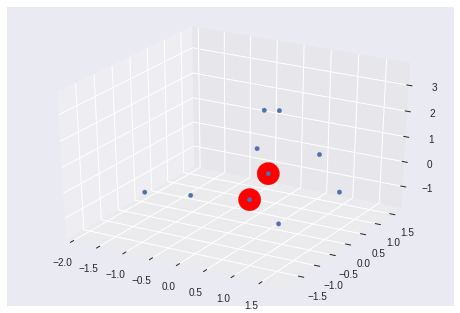

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def get_vec(mean,stddev):
    return np.random.normal(mean,stddev,1)

# Implementation of Closest Pair of Points algorithm
def compute_closest_pair(set_of_points):
    minimum_distance = np.inf; #infinity as a "number"
    best_points = [-1,-1]
    for i in range(set_of_points.shape[0]):
        for j in range(i+1,set_of_points.shape[0]):
            dist = np.linalg.norm(set_of_points[i] - set_of_points[j])
            #print(i,j,dist)
            if(dist < minimum_distance):
                minimum_distance = dist
                best_points = np.array([set_of_points[i],set_of_points[j]])
    return minimum_distance, best_points


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

points_3d = np.random.multivariate_normal(np.zeros(3),np.identity(3),10)
X1, Y1, Z1 = points_3d.T
scatter1 = ax.scatter(X1, Y1, Z1, marker = 'o', alpha=1.0)

distance, best_points = compute_closest_pair(points_3d)
bx, by, bz = best_points.T
scatter2 = ax.scatter(bx, by, bz, color = 'red', marker = 'o', s=500, alpha=1.0)


## 3D Plot animation

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
ax2 = fig.add_subplot(111, projection='3d')
plt.close()

X1, Y1, Z1 = points_3d.T
scatter1 = ax2.scatter(X1, Y1, Z1, marker = 'o', alpha=1.0)

distance, best_points = compute_closest_pair(points_3d)
bx, by, bz = best_points.T
scatter2 = ax2.scatter(bx, by, bz, color = 'red', marker = 'o', s=500, alpha=1.0)

FRAMES = 100
INITIAL_ELEV = 30
INITIAL_AZIMUTH = -37.5

def animate(i):
  ax2.view_init(INITIAL_ELEV, INITIAL_AZIMUTH + i/FRAMES*360)
  return (scatter1,)
  
ani = animation.FuncAnimation(fig, animate, frames=FRAMES, interval=100, repeat=False) 

rc('animation', html='jshtml')
ani
  